---

# САМОСТОЯТЕЛЬНЫЙ ПРОЕКТ: A/B ТЕСТИРОВАНИЕ

# Описание

Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки крупного интернет-магазина.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Цель

Приоритизировать гипотезы, проанализировать A/B-тест и дать рекомендации.

# Задачи

- ПРИОРИТИЗАЦИЯ ГИПОТЕЗ
- АНАЛИЗ A/B ТЕСТА
    - график кумулятивной выручки
    - график кумулятивного среднего чека
    - график относительного изменения кумулятивного среднего чека
    - график кумулятивной конверсии
    - график относительного изменения кумулятивной конверсии
    - точечный график количества заказов
    - 95-й и 99-й перцентили количества заказов
    - точечный график стоимостей заказов
    - 95-й и 99-й перцентили стоимости заказов
    - статистическая значимость различий в конверсии по «сырым» данным
    - статистическая значимость различий в среднем чеке по «сырым» данным
    - статистическая значимость различий в конверсии по «очищенным» данным
    - статистическая значимость различий в среднем чеке по «очищенным» данным
    - решение по результатам теста

---

Перед начало проекта импортируем необходимые для работы с проектом библиотеки:

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

---

## ПРИОРИТИЗАЦИЯ ГИПОТЕЗ

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с параметрами Reach, Impact, Confidence, Effort. 

Оценим существущие параметры и приоритизируем гипотезы во фрейморках ICE и RICE. 

In [2]:
hypo = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.set_option('max_colwidth', 400)

In [4]:
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Фреймворк ICE

In [5]:
hypo['ice'] = (hypo['Impact'] * hypo['Confidence']
              ) / hypo['Efforts']

In [6]:
#отсортируем данные по убыванию
hypo[['Hypothesis', 'ice']].sort_values(by = 'ice', ascending = False)

,Hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**ВЫВОД:** Наиболее перспективные гипотезы: 8, 0, 7, 6

---

### Фреймворк RICE

In [7]:
hypo['rice'] = (hypo['Reach'] * hypo['Impact'] * hypo['Confidence']
               ) / hypo['Efforts']

In [8]:
#отсортируем данные по убыванию
hypo[['Hypothesis', 'rice']].sort_values(by = 'rice', ascending = False)

,Hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**ВЫВОД:** Наиболее перспективные гипотезы: 7, 2, 0, 6. 

На первом месте во фреймворке RICE находится 7-ая, так как её параметр Reach (охват пользователей) равен 10 - это максимум среди всех остальных гипотез. Во фреймворке ICE этот параметр не учитывался. 

По этой же причине на второе место во фреймворке RICE выходит 2-ая гипотеза - её параметр Reach равен 8. 

In [9]:
#топ-4 в параметре Reach по убыванию
hypo.sort_values(by = 'Reach', ascending = False).head(4)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0


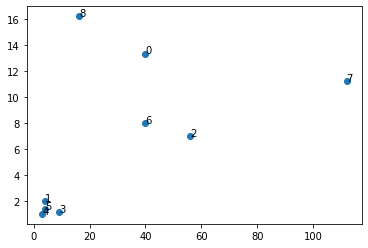

In [10]:
y = hypo['ice']
z = hypo['rice']
n = hypo.index

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

---

## АНАЛИЗ A/B-ТЕСТА

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Импортируем данные и проведем анализ нашего тестирования.

In [11]:
orders = pd.read_csv('/datasets/orders.csv')

In [12]:
visitors = pd.read_csv('/datasets/visitors.csv')

---

### Предобработка данных

Ознакомимся с данными и подготовим их к анализу

In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
#приведем данные даты к корректному типу
orders['date'] = orders['date'].map(lambda x: (dt.datetime.strptime(x, '%Y-%m-%d')))

In [16]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
#приведем данные даты к корректному типу
visitors['date'] = visitors['date'].map(lambda x: (dt.datetime.strptime(x, '%Y-%m-%d')))

---

### Кумулятивная выручка 

Построим график кумулятивной выручки по группам

In [20]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [21]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date']
                                                                     , orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique
                                           , 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1
                                    ).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']
                                                                         , visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1
                                      ).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# присваиваем ее столбцам названия
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [23]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


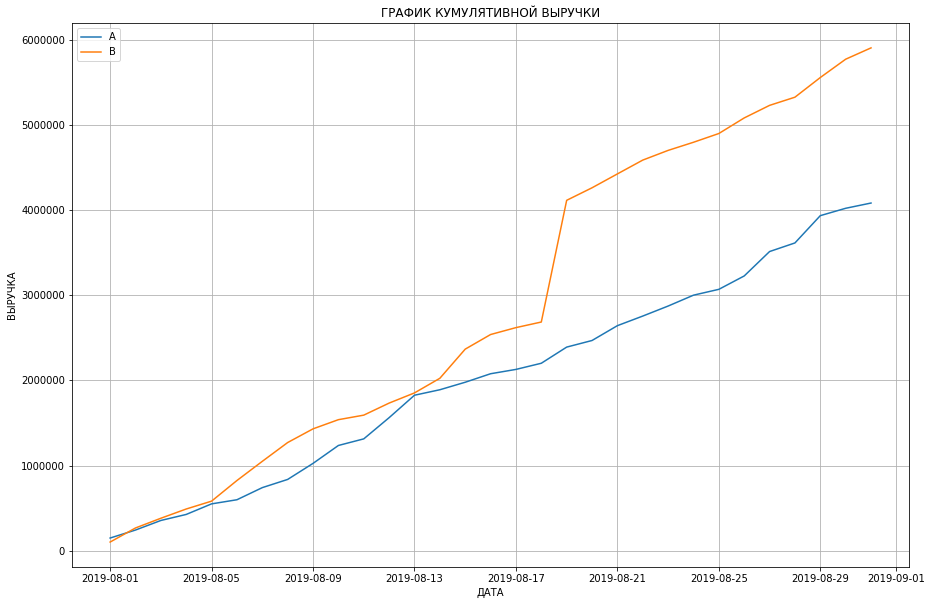

In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 10))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('ГРАФИК КУМУЛЯТИВНОЙ ВЫРУЧКИ')
plt.grid(True)
plt.legend()
plt.ylabel('ВЫРУЧКА')
plt.xlabel('ДАТА')
plt.show()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() 

**ВЫВОД**

Выручка равномерно увеличивается, однако после 17 августа наблюдается **резкий скачок выручки в группе B.** 

Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке этой группы.

---

### Кумулятивный средний чек 

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

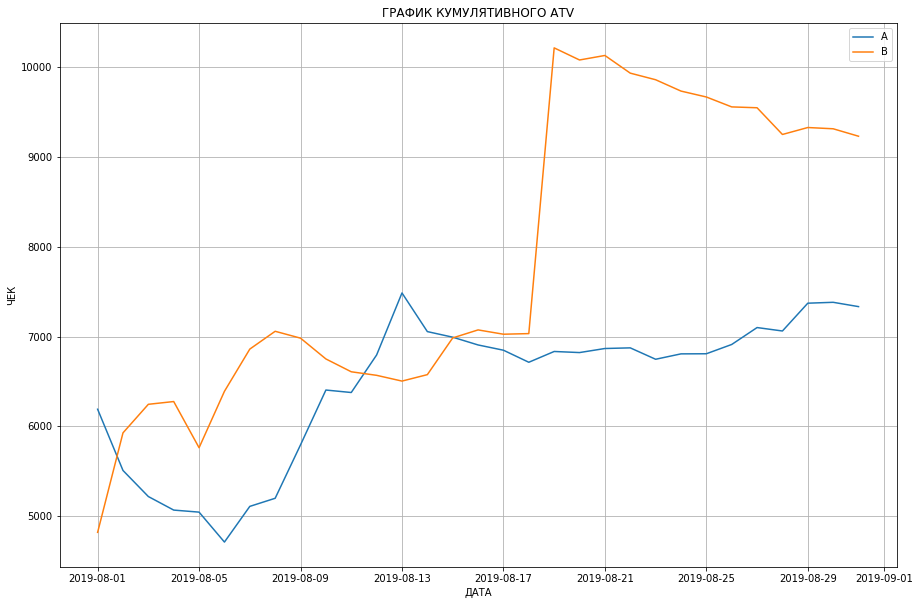

In [25]:
plt.figure(figsize=(15, 10))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('ГРАФИК КУМУЛЯТИВНОГО ATV')
plt.grid(True)
plt.legend()
plt.ylabel('ЧЕК')
plt.xlabel('ДАТА')
plt.show()

**ВЫВОД**

Средний чек очень нестабилен и неравномерен:

- для группы A наблюдается резкое падение в самом начале теста, а затем стремительный подъем. **После 13-ого числа показатель среднего чека для этой группы стабилизировался** и закрепился на отметке ~7000. 

- **для группы B наблюдается обратная тенденция: резкие волнообразные скачки в течение всего теста и затем после 17-ого числа очень резкий подъем.** Далее, показатель среднего чека стабилизируется и начинает падение. Возможно, в группу B во второй половине теста попали очень крупные заказы, которые стали причинами таких резких скачков в показателях выручки и среднего чека. В таком случае, **группе B нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.**

---

### Изменение кумулятивного среднего чека

Построим график относительного изменения кумулятивного среднего чека группы B к группе A

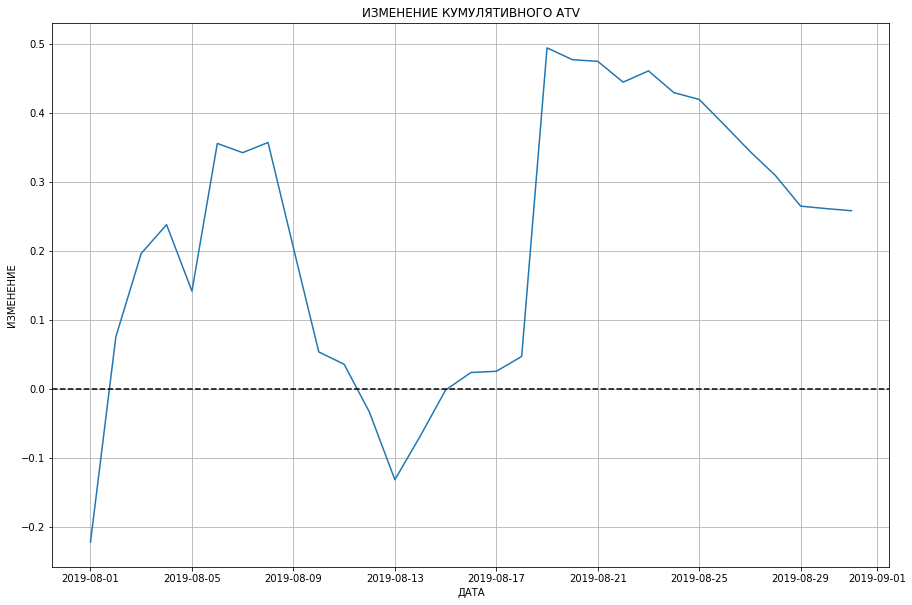

In [26]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date'
                                                   , right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 10))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'
                                                                  ]/mergedCumulativeRevenue['ordersB']
                                          )/(mergedCumulativeRevenue['revenueA'
                                                                    ]/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('ИЗМЕНЕНИЕ КУМУЛЯТИВНОГО ATV')
plt.grid(True)
plt.ylabel('ИЗМЕНЕНИЕ')
plt.xlabel('ДАТА')
plt.show()

**ВЫВОД**

**График изменения среднего чека между группами имеет сильные скачки.** Очевидно, что на протяжении практически всего теста в данных пристуствовали выбросы: в количествах заказов и их сумме.

---

### Кумулятивная конверсия

Построим график кумулятивной конверсии по группам

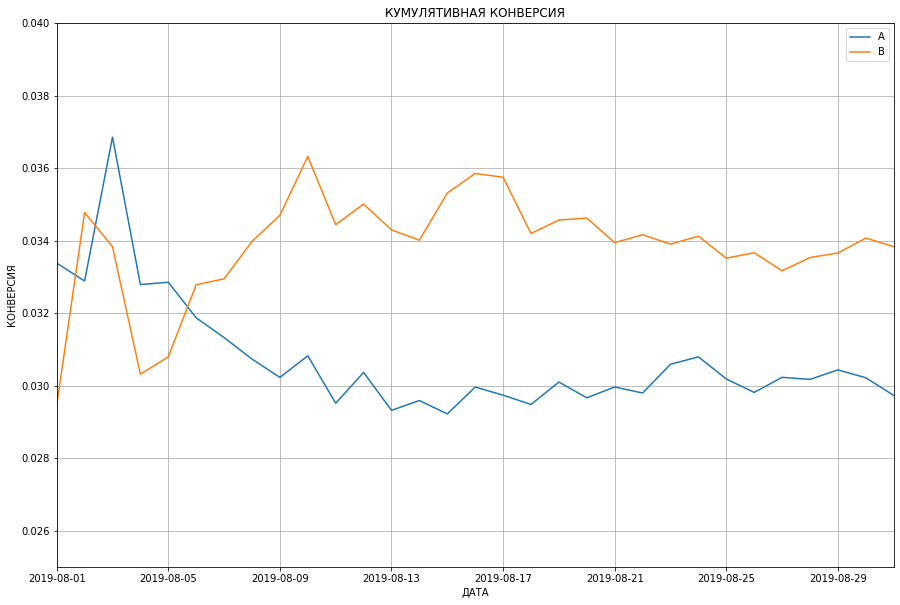

In [27]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 10))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.025, 0.04])
plt.title('КУМУЛЯТИВНАЯ КОНВЕРСИЯ')
plt.grid(True)
plt.ylabel('КОНВЕРСИЯ')
plt.xlabel('ДАТА')
plt.show()

**ВЫВОД**

- Группы имели примерно симметричные скачки в начале теста, но потом конверсии заняли стабильные позиции на разных уровнях: группа А - с более низкой конверсией, группа B - с более высокой.

- Также, мы видим, что у группы B в диапазоне 9-ого и 17-ого числа наблюдается резкий рост конверсии. Это соответствует скачкам на графиках среднего чека и выручки. Возможно, это говорит о том, что в эти дни действительно было или нетипично большое количество покупателей или заказы с большим средним чеком.

---

### Изменение кумулятивной конверсии

Построим график относительного изменения кумулятивной конверсии группы B к группе A

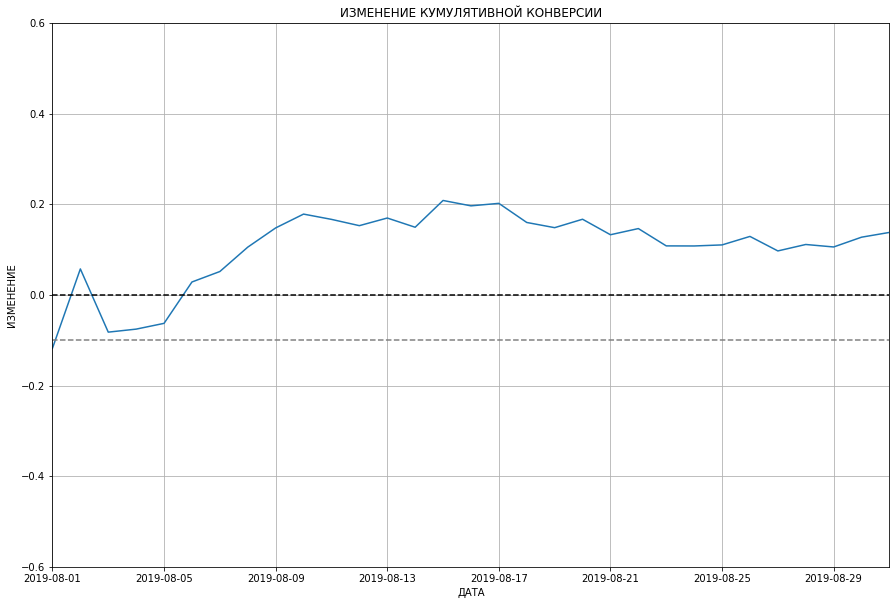

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']
                                             ].merge(cumulativeDataB[['date','conversion']
                                                                    ], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 10))

# cтроим отношение конверсии
plt.plot(mergedCumulativeConversions['date']
         , mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6]) 
plt.title('ИЗМЕНЕНИЕ КУМУЛЯТИВНОЙ КОНВЕРСИИ')
plt.grid(True)
plt.ylabel('ИЗМЕНЕНИЕ')
plt.xlabel('ДАТА')
plt.show()

**ВЫВОД**

В начале теста группы имели примерно симметричные скачки в конверсии, но уже **после 5-ого числа группа B установила преимущество и стабилизировало показатель конверсии.** 

---

### Точечный график количества заказов

Подсчитаем количество заказов по пользователям

In [29]:
ordersByUsers = (
    orders.drop(['revenue', 'date'], axis=1)
    .groupby(['visitorId', 'group'], as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'group', 'orders']

In [30]:
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,group,orders
1079,4256040402,A,7
619,2458001652,B,6
511,2038680547,A,5
596,2378935119,B,5
618,2458001652,A,5
595,2378935119,A,4
45,199603092,A,4
941,3717692402,B,4
963,3803269165,B,4
58,237748145,A,4


Построим точечную диаграмму числа заказов на одного пользователя:

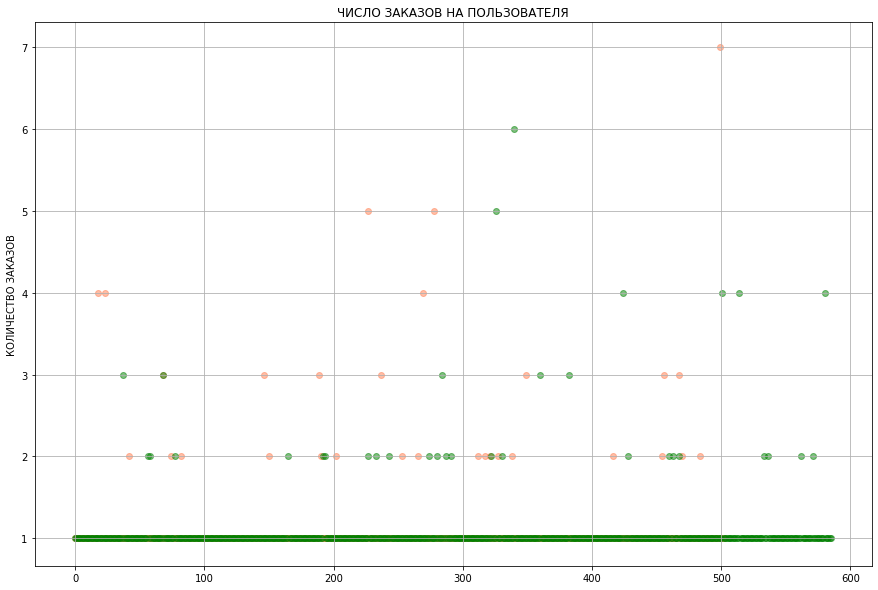

In [31]:
plt.figure(figsize=(15, 10))

x = pd.Series(range(0,len(ordersByUsers.loc[ordersByUsers['group'] == "A"])))
y = ordersByUsers.loc[ordersByUsers['group'] == "A", ['orders']]
plt.scatter(x, y, c='coral', alpha = 0.5)

x = pd.Series(range(0,len(ordersByUsers.loc[ordersByUsers['group'] == "B"])))
y = ordersByUsers.loc[ordersByUsers['group'] == "B", ['orders']]
plt.scatter(x, y, c='green', alpha = 0.5) 

plt.title('ЧИСЛО ЗАКАЗОВ НА ПОЛЬЗОВАТЕЛЯ')
plt.grid(True)
plt.ylabel('КОЛИЧЕСТВО ЗАКАЗОВ')
plt.show()

**ВЫВОД**

- **Большинство покупателей заказывали один раз**, но пользователей с 2-3 заказами тоже много. Для более точного анализа и выводов необходимо посчитать выборочные перцентили количества заказов.

- Однако, уже из графика очевидно, что покупатели с количеством заказов более 4 - это выбросы в наших данных. 

---

###  95-й и 99-й перцентили количества заказов

95-й и 99-й перцентили количества заказов на пользователя

In [33]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**ВЫВОД**

Не более 5% пользователей оформляли больше чем 2 заказа. И всего 1% пользователей заказывали более 4 раз.

Установим границу числа заказов для определения аномалий: **3 заказа на одного пользователя.**

---

### Точечный график стоимостей заказов

Оценим стоимость заказов с помощью точечного графика

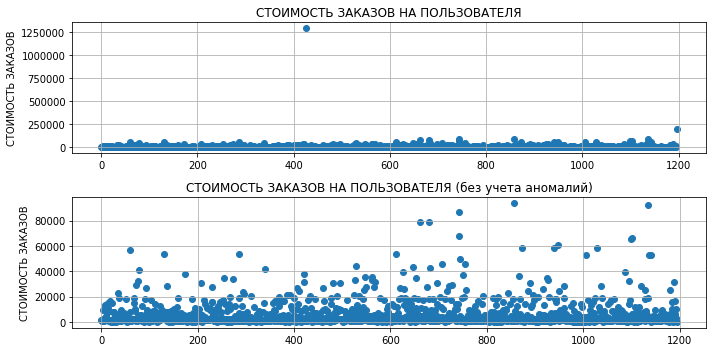

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.scatter(x_values, orders['revenue'])
plt.title('СТОИМОСТЬ ЗАКАЗОВ НА ПОЛЬЗОВАТЕЛЯ')
plt.grid(True)
plt.ylabel('СТОИМОСТЬ ЗАКАЗОВ')


orders_new = orders.query('revenue <200000')

x_values = pd.Series(range(0,len(orders_new['revenue'])))
plt.subplot(2, 1, 2)
plt.scatter(x_values, orders_new['revenue'])
plt.title('СТОИМОСТЬ ЗАКАЗОВ НА ПОЛЬЗОВАТЕЛЯ (без учета аномалий)')
plt.grid(True)
plt.ylabel('СТОИМОСТЬ ЗАКАЗОВ')


plt.tight_layout()
plt.show()


**ВЫВОД**

Большинство значений попадают в диапазон до 100000. Однако, **есть нетипично большие заказы.** Мы видим на графике один заказ на сумму более, чем на 1200000 и один заказ на 200000 - такие цифры могут очень сильно повлиять на средние значения для всей группы, что, скорее всего и произошло с нашими данными. 

---

###  95-й и 99-й перцентили стоимости заказов

95-й и 99-й перцентили стоимости заказов на пользователя

In [36]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**ВЫВОД**

Не более 5% пользователей оформляли заказы стоимостью больше чем 28000. И всего 1% пользователей заказывали на сумму более 58233.

Установим границу стоимости заказов для определения аномалий: **30000**

---

### Cтатистическая значимость различий в конверсии по "сырым" данным

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Начнём с подготовки данных:

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [38]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Итак, мы получили новый фрейм, где:

- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Теперь посчитаем статистическую значимость различия в конверсии между группами

In [39]:
#создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [40]:
#объявим переменные sampleA и sampleB, в которых пользователям из разных групп 
#будет соответствовать количество заказов

#тем, кто ничего не заказал, будут соответствовать нули

sampleA = pd.concat( #объединить по строкам
    [
        ordersByUsersA['orders'], #список с количеством заказов для каждого из пользователей
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']) #нули для пользователей, которые ничего не заказывали
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat( #объединить по строкам
    [
        ordersByUsersB['orders'], #список с количеством заказов для каждого из пользователей
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']) #нули для пользователей, которые ничего не заказывали
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Значимость различий в конверсии по результатам проверки критерием Манна-Уитни:**

In [41]:
#p-value
"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1])

'0.017'

In [42]:
#относительный прирост конверсии группы B
"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'0.138'

**ВЫВОД:**

- По «сырым» данным различия в конверсии групп A и B есть.

- Первое число — p-value = 0.017 < 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 

- Относительный выигрыш группы B равен 13.8% — второе число в выводе.


Выводы логичны. Ранее мы уже могли видеть, что графики конверсии групп сильно отличаются, в том числе, из-за сильных скачков в числе заказов у группы B.

---

### Cтатистическая значимость различий в среднем чеке по "сырым" данным

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

А также найдём относительные различия в среднем чеке между группами:

Сформулируем гипотезы:
    
    Нулевая гипотеза: средний чек группы A и группы B не имеет статистически значимых различий
    Альтернативная гипотеза: средний чек группы A и группы B имеет статистически значимые различия
    
Уровень статистической значимости для теста (p-value) = 0.05

In [55]:
#p-value
'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                    orders[orders['group']=='B']['revenue'], 
                                    alternative='two-sided')[1])

'0.729'

In [54]:
#относительный прирост среднего чека группы B
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'
                                                   ].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.259'

**ВЫВОД**

- P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет

- Однако, средний чек группы B значительно выше среднего чека группы A - более, чем на 25%

---

### Cтатистическая значимость различий в конверсии по "очищенным" данным

- Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30000 рублей. Так мы уберём тот небольшой процент пользователей с наибольшим числом заказов и пользователей с дорогими заказами. 

- Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. 

- Объединим их в таблице abnormalUsers.

- Узнаем, сколько всего аномальных пользователей методом shape()

In [45]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [46]:
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64

In [47]:
#всего аномальных пользователей
abnormalUsers.shape

(57,)

**Всего 57 аномальных пользователей.**


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [48]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers)) 
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы:
    
    Нулевая гипотеза: конверсия группы A и группы B не имеет статистически значимых различий
    Альтернативная гипотеза: конверсия группы A и группы B имеет статистически значимые различия
    
Уровень статистической значимости для теста (p-value) = 0.05

In [56]:
#p-value
'{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1])

'0.018'

In [57]:
#относительный прирост конверсии группы B
'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.148'

**ВЫВОД**

Результаты по конверсии практически не изменились. Аномалии не сильно повлияли на этот показатель.

---

### Cтатистическая значимость различий в среднем чеке по "очищенным" данным

Сформулируем гипотезы:
    
    Нулевая гипотеза: средний чек группы A и группы B не имеет статистически значимых различий
    Альтернативная гипотеза: средний чек группы A и группы B имеет статистически значимые различия
    
Уровень статистической значимости для теста (p-value) = 0.05

In [58]:
#p-value

'{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative='two-sided',
        )[1]
    )

'0.958'

In [59]:
#относительный прирост среднего чека группы B

"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )

'-0.020'

**ВЫВОД:**

- P-value сильно увеличился, а разница между группами изменилась практически с полной противоположностью - теперь прирост среднего чека группы B с преимуществом в 25% сменился преимуществом группы А на целых 20%.

- Это хорошо показывает нам, как сильно могут влиять аномалии на показатели тестируемых групп. 

Таким образом, мы выяснили, что несмотря на прирост конверсии в группе B - суммы заказов там не увеличивались, а наоборот, падали, так как средний чек в итоге достаточно сильно проигрывает группе A. Теперь картина выглядит более полной: в группе B произошел резкий рост заказов, но, вероятно, со средним чеком ниже среднего.

---

## ВЫВОД

По результатам анализа:

- Наблюдается статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий в пользу группы B (+14%). В этой группе произошел резкий скачок заказов, что привело к увеличению и закреплению такой конверсии. 

---

- Статистически значимое различия по среднему чеку между группами:

 - по «сырым» данным: есть в пользу группы B (+25%)
 - после фильтрации аномалий: есть, но, наоборот, в пользу группы A (+20%)
 
Очевидно, что такое изменение связано с очень сильными аномалиями в группе B - а именно два заказа (на сумму 1200000 и 200000), после фильтрации которых средний чек группы B упал так сильно, что группа А вырвала преимущество в 20%. 

---

- График различия конверсии между группами показывает, что результаты группы B значительно лучше группы A и такая динамика закрепилась

---

- График различия среднего чека говорит о том, что результаты группы B имели резкий скачок и средний показатель на 25% лучше, чем в группе А. Однако, после фильтрации аномальных показателей показатель среднего чека в группе B упал и стал ниже на 20%, чем средний показатель чека в группе A. 

---




Исходя из результатов теста мы можем сделать вывод о том, что: 

- группа B имеет однозначное преимущество: бóльшее количество заказов и бóльшую кумулятивную выручку (которая продолжает расти). Однако, также, группа B имеет более низкий средний чек.

- группа A имеет более низкую конверсию и выручку, однако, вероятно, за счёт более высокого среднего чека выручка имеет также положительную динамику.

**Исходя из обнаруженных фактов, тест можно признать успешным. Очевидно, что группа B имеет явные преимущества по ключевым показателям: конверсии и выручке.**

**Что касается среднего чека, то при резком росте количества заказов - падение среднего чека, как мне кажется, вполне естественный процесс.**

**На это можно посмотреть с другой стороны: выросшая конверсия, которая дала нам большое количество новых покупателей, принесла и новые задачи: теперь нужно стимулировать новых клиентов на совершение более дорогих заказов;**